Epoch 1/20


/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.0125e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1721e-05
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.6166e-05
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5637e-05
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8264e-05
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.6613e-05
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9521e-05
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9068e-05
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8697e-05
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8496e-05
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9170e-05
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6688e-05
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5157e-05
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4716e-05
Epoch 15/20
12/12 ━━━━━━━━

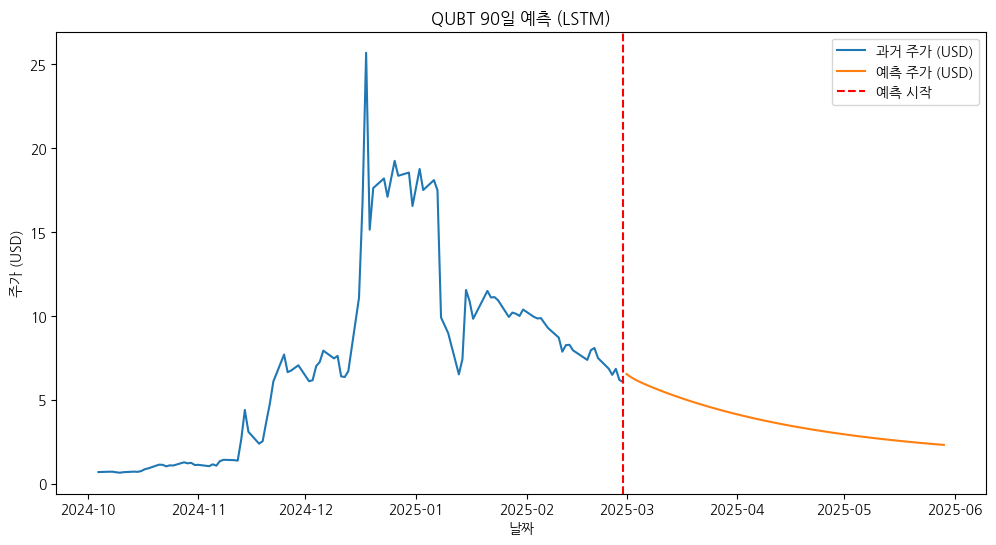

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 가져오기
stock = yf.Ticker("QUBT")
data = stock.history(start="2023-01-01", end="2025-03-03")
prices = data['Close'].values.reshape(-1, 1)

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# 시퀀스 데이터 생성 (look_back=60일)
look_back = 60
X, y = [], []
for i in range(look_back, len(scaled_prices)):
    X.append(scaled_prices[i-look_back:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 학습/테스트 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 미래 90일 예측
last_sequence = scaled_prices[-look_back:]
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(90):
    next_pred = model.predict(current_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_pred[0, 0]

# 스케일링 해제
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], prices[-100:], label="과거 주가 (USD)")
plt.plot(pd.date_range(start=data.index[-1], periods=91, freq='D')[1:], future_predictions, label="예측 주가 (USD)")
plt.axvline(x=data.index[-1], color='r', linestyle='--', label="예측 시작")
plt.title("QUBT 90일 예측 (LSTM)")
plt.xlabel("날짜")
plt.ylabel("주가 (USD)")
plt.legend()
plt.show()

#### LSTM 1차 적용 결과
- 2023년 1월~2025년 3월(약 2년, 500일) 데이터는 시계열 학습에 비해 상대적으로 짧음.
- look_back=60 60일 데이터를 기반으로 다음 값을 예측하였기 때문에 시퀸스가 다소 길다.
- epochs = 20 의 학습이 충분하지 않다 판단 됨.
- 문제되는 부분 변경하여 다시 실행필요

Epoch 1/50


/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.0922e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.9794e-05
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.2686e-05
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.1695e-05
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.3375e-05
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7482e-05
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.6523e-05
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.9972e-05
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4629e-05
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6094e-05
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4229e-05
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3308e-05
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5712e-05
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1492e-05
Epoch 15/50
26/26 ━━━━━━━━

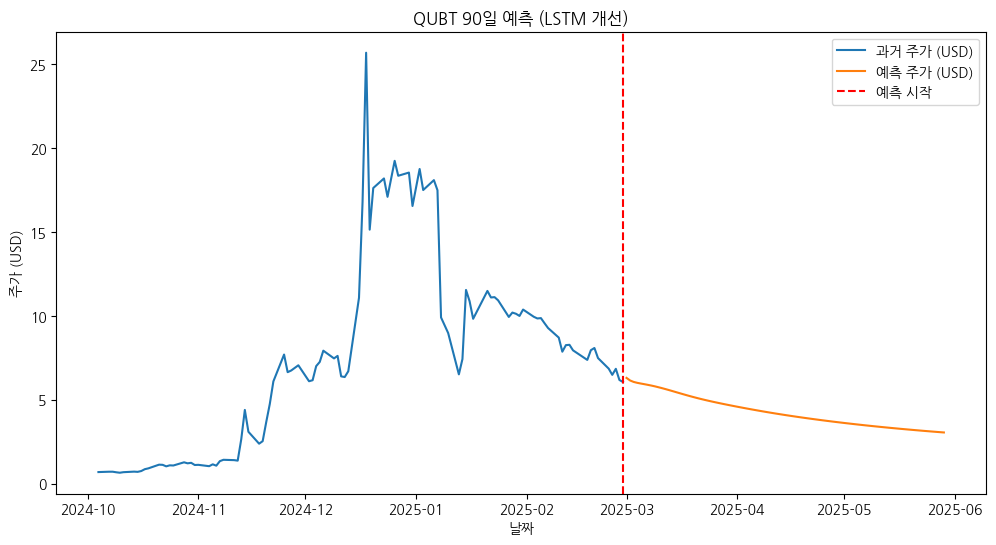

In [8]:
# 시퀀스 또는 슬라이딩 윈도우 데이터 생성 (look_back=30일)
look_back = 30
X, y = [], []
for i in range(look_back, len(scaled_prices)):
    X.append(scaled_prices[i-look_back:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 학습/테스트 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# LSTM 모델 생성 (구조 강화)
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# 미래 90일 예측
last_sequence = scaled_prices[-look_back:]
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(90):
    next_pred = model.predict(current_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_pred[0, 0]

# 스케일링 해제
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], prices[-100:], label="과거 주가 (USD)")
plt.plot(pd.date_range(start=data.index[-1], periods=91, freq='D')[1:], future_predictions, label="예측 주가 (USD)")
plt.axvline(x=data.index[-1], color='r', linestyle='--', label="예측 시작")
plt.title("QUBT 90일 예측 (LSTM 개선)")
plt.xlabel("날짜")
plt.ylabel("주가 (USD)")
plt.legend()
plt.show()

#### LSTM 2차 적용 결과
- look_back = 1 , look_back = 100 , epoch = 60 으로 변경해도 똑같은 직선의 형태 그래프 발생
- 문제 시계열 데이터를 나누어 학습 시키지 않고 전체를 학습했기 때문에 변동성이 평균으로 수렴
- 데이터를 나누어 학습 시키는 과정 필요

Epoch 1/50


/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.9278e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.4001e-05
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.3112e-05
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.7236e-05
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4956e-05
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6002e-05
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.8359e-05
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.9931e-05
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4006e-05
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.5151e-05
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.0815e-05
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1596e-05
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6468e-05
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2757e-05
Epoch 15/50
26/26 ━━━━━━━━

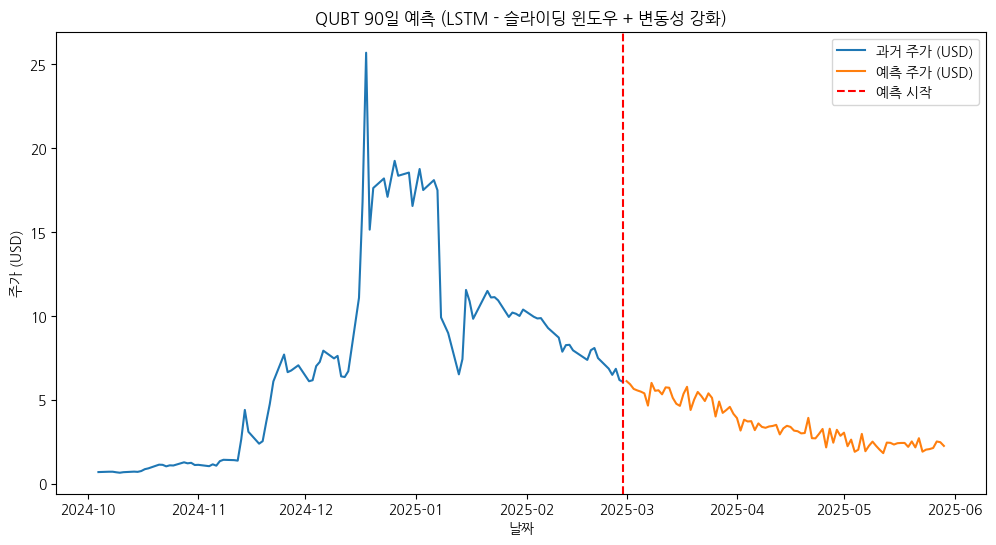

In [9]:
# 시퀀스 또는 슬라이딩 윈도우 데이터 생성 (look_back=30일)
look_back = 30
X, y = [], []
for i in range(look_back, len(scaled_prices)):
    X.append(scaled_prices[i-look_back:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 학습/테스트 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# 변동성 계산 (스케일링 해제된 값 기준)
volatility = np.std(np.diff(data['Close'])) * 0.5  # 원래 가격 기준 변동성

# 미래 90일 예측 (슬라이딩 윈도우 + 변동성 반영)
last_sequence = scaled_prices[-look_back:]
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(90):
    # 현재 시퀀스로 예측
    next_pred_scaled = model.predict(current_sequence.reshape(1, look_back, 1))[0, 0]
    # 스케일링 해제 후 노이즈 추가
    next_pred = scaler.inverse_transform([[next_pred_scaled]])[0, 0]
    noise = np.random.normal(0, volatility, 1)[0]
    next_pred += noise
    # 다시 스케일링해 시퀀스에 추가
    next_pred_scaled = scaler.transform([[next_pred]])[0, 0]
    future_predictions.append(next_pred)
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_pred_scaled

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], prices[-100:], label="과거 주가 (USD)")
plt.plot(pd.date_range(start=data.index[-1], periods=91, freq='D')[1:], future_predictions, label="예측 주가 (USD)")
plt.axvline(x=data.index[-1], color='r', linestyle='--', label="예측 시작")
plt.title("QUBT 90일 예측 (LSTM - 슬라이딩 윈도우 + 변동성 강화)")
plt.xlabel("날짜")
plt.ylabel("주가 (USD)")
plt.legend()
plt.show()

#### LSTM 3차 적용 결과
- LSTM 모델 특성은 평균화에 기반되어 있기 때문에 작은 움직임은 모두 평균에 수렴하게 끔 만들어져있다
- QUBT 종목을 예측해보니 작은 변동성을 띄었기 때문에 이를 모두 평균에 수렴하여 결과가 나오게 되었다(즉 2차 적용결과 직선표시 타당)
- QUBT의 최근 30일 데이터(2025년 3월 기준) 2024년 11월 폭등(15 USD 이상) 이후 하락 현재 7.8 USD에 안정화된 상태. 
- 즉 이 기간 동안 변동성이 작았기 때문에, LSTM은 "변화가 없는 상태"를 학습
- 따라서 강제로 변동성을 주어야 그래프의 상승과 하락을 볼 수가 있었음
  - 변동성 0.5 값을 설정한 이유 
  - 1. 현실적인 변동성 반영 너무 큰 변동성은 주가 움직임이 비현실적으로 나타나게 됨
  - 2. QUBT는 변동성이 큰 주식이지만 최근 30일은 안정화 상태로 기준 변동성 값이 작아졌음
  - 3. 실제 noise_scales = [0.1, 0.5, 1.0, 2.0] 을 테스트 해본결과 그래프가 비현실적으로 나타남.
  - 4. 2025.03.12 현재 토스증권의 QUBT 주가 그래프는 변동성을 0.5로 설정 했을때와 아주 유사함

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

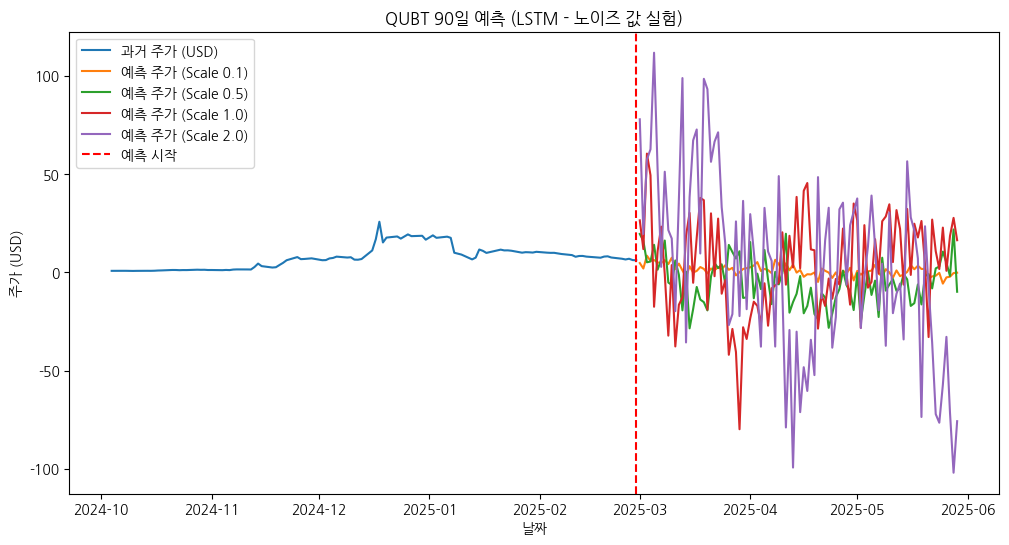

In [ ]:
# # 노이즈 값 실험
# noise_scales = [0.1, 0.5, 1.0, 2.0]  # 실험할 값들
# all_predictions = {}

# for scale in noise_scales:
#     future_predictions = []
#     current_sequence = last_sequence.copy()
#     volatility = np.std(np.diff(data['Close'])) * scale
#     for _ in range(90):
#         next_pred_scaled = model.predict(current_sequence.reshape(1, look_back, 1))[0, 0]
#         noise = np.random.normal(0, volatility, 1)[0]
#         next_pred_scaled += noise
#         next_pred = scaler.inverse_transform([[next_pred_scaled]])[0, 0]
#         future_predictions.append(next_pred)
#         current_sequence = np.roll(current_sequence, -1)
#         current_sequence[-1] = next_pred_scaled
#     all_predictions[f'Scale {scale}'] = future_predictions

# # 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(data.index[-100:], prices[-100:], label="과거 주가 (USD)")
# for scale, preds in all_predictions.items():
#     plt.plot(pd.date_range(start=data.index[-1], periods=91, freq='D')[1:], preds, label=f"예측 주가 ({scale})")
# plt.axvline(x=data.index[-1], color='r', linestyle='--', label="예측 시작")
# plt.title("QUBT 90일 예측 (LSTM - 노이즈 값 실험)")
# plt.xlabel("날짜")
# plt.ylabel("주가 (USD)")
# plt.legend()
# plt.show()